In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from dataProcessing import getData, DataProcessing

In [2]:
train_data_many_day_x, train_data_many_day_y, dev_data_many_day_x, dev_data_many_day_y, \
            test_data_many_day_x, test_data_many_day_y = getData()

In [3]:
pr = DataProcessing(train_data_many_day_x, train_data_many_day_y)
train_data_many_day_x = pr.preprocessInput(train_data_many_day_x)
dev_data_many_day_x = pr.preprocessInput(dev_data_many_day_x)
test_data_many_day_x = pr.preprocessInput(test_data_many_day_x)
train_data_many_day_y = pr.preprocessOutput(train_data_many_day_y)
dev_data_many_day_y = pr.preprocessOutput(dev_data_many_day_y)
test_data_many_day_y = pr.preprocessOutput(test_data_many_day_y)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
from ElapsedTime import ElapsedTime

dropout = 0.5
l2 = 1e-5
patience=10
early_stopping=EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)

model = Sequential()
model.add(Dense(units=28, activation='relu', input_dim=4*7, kernel_regularizer=regularizers.l2(l2)))
model.add(Dropout(dropout))
model.add(Dense(units=28, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(Dropout(dropout))
model.add(Dense(units=14, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(Dropout(dropout))
model.add(Dense(units=7, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(Dropout(dropout))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])
with ElapsedTime('training'):
    hst = model.fit(train_data_many_day_x, train_data_many_day_y, validation_data=(dev_data_many_day_x, dev_data_many_day_y),
              verbose=2, epochs=1000, batch_size=4096, callbacks=[early_stopping])
hst = hst.history

Train on 28119 samples, validate on 4097 samples
Epoch 1/1000
 - 1s - loss: 0.0538 - mean_squared_error: 0.0530 - val_loss: 0.0323 - val_mean_squared_error: 0.0315
Epoch 2/1000
 - 0s - loss: 0.0442 - mean_squared_error: 0.0434 - val_loss: 0.0344 - val_mean_squared_error: 0.0336
Epoch 3/1000
 - 0s - loss: 0.0391 - mean_squared_error: 0.0383 - val_loss: 0.0359 - val_mean_squared_error: 0.0351
Epoch 4/1000
 - 0s - loss: 0.0367 - mean_squared_error: 0.0359 - val_loss: 0.0354 - val_mean_squared_error: 0.0346
Epoch 5/1000
 - 0s - loss: 0.0354 - mean_squared_error: 0.0346 - val_loss: 0.0344 - val_mean_squared_error: 0.0336
Epoch 6/1000
 - 0s - loss: 0.0347 - mean_squared_error: 0.0339 - val_loss: 0.0333 - val_mean_squared_error: 0.0324
Epoch 7/1000
 - 0s - loss: 0.0337 - mean_squared_error: 0.0329 - val_loss: 0.0318 - val_mean_squared_error: 0.0310
Epoch 8/1000
 - 0s - loss: 0.0329 - mean_squared_error: 0.0321 - val_loss: 0.0309 - val_mean_squared_error: 0.0301
Epoch 9/1000
 - 0s - loss: 0.03

Epoch 72/1000
 - 0s - loss: 0.0182 - mean_squared_error: 0.0175 - val_loss: 0.0096 - val_mean_squared_error: 0.0090
Epoch 73/1000
 - 0s - loss: 0.0180 - mean_squared_error: 0.0174 - val_loss: 0.0101 - val_mean_squared_error: 0.0095
Epoch 74/1000
 - 0s - loss: 0.0180 - mean_squared_error: 0.0174 - val_loss: 0.0102 - val_mean_squared_error: 0.0096
Epoch 75/1000
 - 0s - loss: 0.0179 - mean_squared_error: 0.0172 - val_loss: 0.0098 - val_mean_squared_error: 0.0092
Epoch 76/1000
 - 0s - loss: 0.0182 - mean_squared_error: 0.0175 - val_loss: 0.0094 - val_mean_squared_error: 0.0088
Epoch 77/1000
 - 0s - loss: 0.0178 - mean_squared_error: 0.0172 - val_loss: 0.0096 - val_mean_squared_error: 0.0090
Epoch 78/1000
 - 0s - loss: 0.0181 - mean_squared_error: 0.0175 - val_loss: 0.0106 - val_mean_squared_error: 0.0100
Epoch 79/1000
 - 0s - loss: 0.0180 - mean_squared_error: 0.0174 - val_loss: 0.0098 - val_mean_squared_error: 0.0092
Epoch 80/1000
 - 0s - loss: 0.0178 - mean_squared_error: 0.0172 - val_lo

In [17]:
model.evaluate(dev_data_many_day_x, dev_data_many_day_y)

4097/4097 [==============================] - 0s 42us/step


[0.0082437919795695924, 0.0076605342168653183]

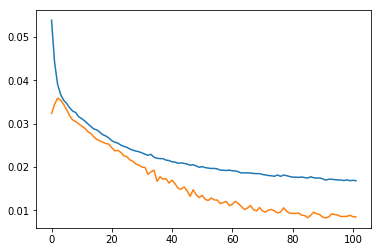

In [18]:
plt.plot(hst['loss'])
plt.plot(hst['val_loss'])
plt.show()

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 14)                406       
_________________________________________________________________
dropout_7 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 105       
__________

In [20]:
model.evaluate(dev_data_many_day_x, dev_data_many_day_y)
model.evaluate(test_data_many_day_x, test_data_many_day_y)

7954/7954 [==============================] - 0s 41us/step


[0.007375836863796263, 0.0067925790358997033]

In [22]:
pr.postProcessOutput(model.predict(test_data_many_day_x))

array([[ 17.4682827 ],
       [  9.94688606],
       [  9.94688606],
       ..., 
       [ 23.24634933],
       [  9.94688606],
       [  9.94688606]], dtype=float32)

In [10]:
pr.postProcessOutput(test_data_many_day_y)

array([[ 19.8],
       [  2.7],
       [  1.3],
       ..., 
       [ 25.6],
       [  2.8],
       [  0.2]])